# Graduate Project
### Eric Gibson
### GEOG 5541: Principles of Geocomputing
### Due Date: 4/28/2023

For this project, I looked into the "sky islands" of the Southwestern United States and Northern Mexico and compared differences in vegetation between 2005 and 2021 to determine total habitat loss for species that consider these unique places home. Sky islands are a term given to small mountain ranges within deserts, grasslands, or other arid environments unfavorable for life (the Sonoran Desert, in this case), which allow for more moisture and, thus, more vegetation at the higher elevations of these ranges. This is due to orographic lifting, the process of air masses rising due to geologic features (like mountains) and cooling to form clouds leading to increased precipitation. The difference in the amount of vegetation at these higher elevations has led to certain species of animals calling these small "islands" home, as they cannot traverse down the slopes to the more extreme arid habitats at the lower elevations. Many of these species have evolved to become their own species, like the Mount Graham Red Squirrel for example, which is only found within about a 130 square kilometer area within the Pinaleño Mountains of Arizona. 

My goal for this project is to find the total loss of forests within these sky islands due to climate change over a 16-year period. The final product will be calculated using the Difference Normalized Burn Ratio (dNBR), which is done by subtracting the Normalized Difference Vegetation Index (NDVI) of the earlier raster (2005) from the NDVI of the later raster (2021). The final product of this project provides a raster of the total area influenced by climate change derived desertification and, thus, the total area of habitat loss for animal species which consider the Sierra Los Ajos (the mountain range depicted in the Landsat rasters within the zip file) of Northern Mexico home. I originally acquired this data from the United States Geological Survey's (USGS) Earth Explorer. The rasters within the zipfile are Landsat 7 imagery taken on June 6, 2005 and June 18, 2021.

Typically, the dNBR is used to detect burns, as vegetation that has been dried out from a wildfire provides a large difference between NDVI of healthy vegetation. However, the smaller NDVI values within desert environments compared to forest environments, still allows for a significant difference in NDVI and a recordable dNBR value. Still, due to this project calculating the dNBR value, I also added calculations to find the total area influenced by each severity level of a burn according to the United States Geological Survey (USGS) burn severity classification table. If the user would like to detect the severity of a wildfire using dNBR, that is also possible with this project.

In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Rasters from Sierra_Los_Ajos zipfile for each input below:
#### Are the raster multi-band or single band? (Answer "Multi" or "Single") --> Single
#### Less recent NIR band raster: 20050606_NIR_Band.TIF
#### Less recent Red band raster: 20050606_Red_Band.TIF
#### More recent NIR band raster: 20210618_NIR_Band_Sierra.TIF
#### More recent Red band raster: 20210618_Red_Band_Sierra.TIF

What satellite acquired this raster data? (Landsat 7, Landsat 8, Sentinel) Landsat 7
Are the rasters you have multi-band or single band? (Answer "Multi" or "Single") Single
Input your less recent NIR band raster: 20050606_NIR_Band.TIF
Input your less recent Red band raster: 20050606_Red_Band.TIF
Input your more recent NIR band raster: 20210618_NIR_Band_Sierra.TIF
Input your more recent Red band raster: 20210618_Red_Band_Sierra.TIF
Displayed below are the rasters you input:


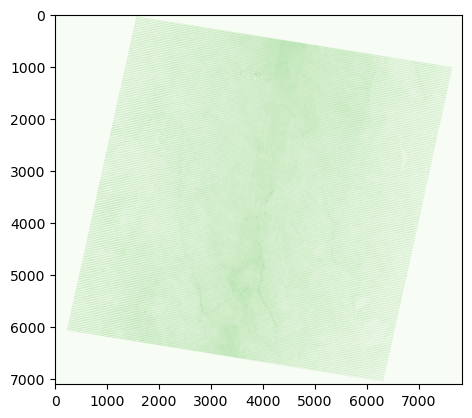

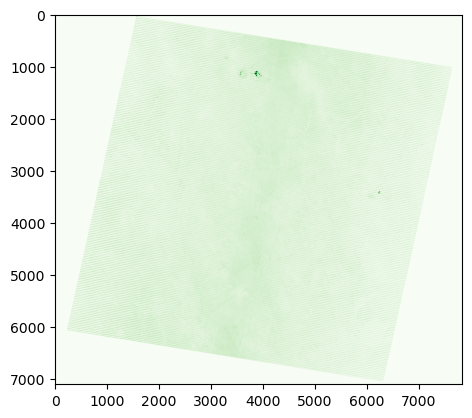

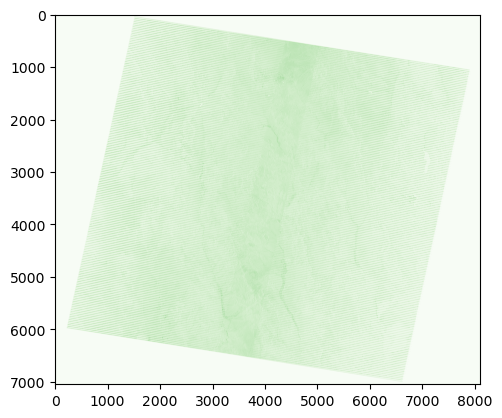

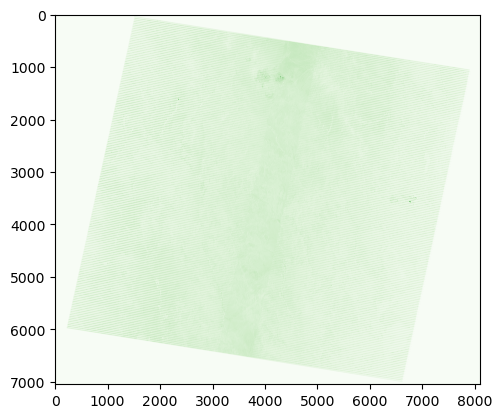

In [2]:
while True: # While statements below are true
    satellite = input('What satellite acquired this raster data? (Landsat 7, Landsat 8, Sentinel) ') # Ask user which satellite the data they are using came from
    
    if satellite != 'Landsat 7' and satellite != 'Landsat 8' and satellite != 'Sentinel':
        print('Sorry, could not understand "' + satellite + '". Please input "Landsat 7", "Landsat 8", or "Sentinel".')
        continue
    
    separate_or_not = input('Are the rasters you have multi-band or single band? (Answer "Multi" or "Single") ') # Ask user if the raster is

    if separate_or_not == 'Multi': # If user input "Multi"
        early = input('Input your less recent multiband raster. ') # Ask user to input their earlier multiband raster
        later = input('Input your more recent multiband raster. ') # Ask user to input their later multiband raster
        early_data = rasterio.open(early) # Open the earlier multiband raster and add it to a variable
        later_data = rasterio.open(later) # Open the later multiband raster and add it to a variable
        if satellite == 'Landsat 7': # If user answered "Landsat 7" to the "What satellite acquired this raster data?" question
            NIR_before_grid = early_data.read(4) # Make variable for early raster from Band 4 of Landsat 7 (NIR)
            Red_before_grid = early_data.read(3) # Make variable for early raster from Band 3 of Landsat 7 (Red)
            NIR_after_grid = early_data.read(4) # Make variable for later raster from Band 4 of Landsat 7 (NIR)
            Red_after_grid = early_data.read(3) # Make variable for later raster from Band 3 of Landsat 7 (Red)
        
            # Create a list of each raster
            rast_list = [NIR_before_grid,Red_before_grid,NIR_after_grid,Red_after_grid]

            print('Displayed below are the rasters you input:')
            for raster in rast_list: # For each raster in the list above
                # Create the raster and display it
                plt.imshow(raster,cmap="Greens")
                plt.show()
        break # End the while loop
        
        # Repeat steps from line 10 to line 24, except use bands 5 and 4 for NIR and Red respectively
        if satellite == 'Landsat 8':
            NIR_before_grid = early_data.read(5)
            Red_before_grid = early_data.read(4)
            NIR_after_grid = early_data.read(5)
            Red_after_grid = early_data.read(4)
        
            # Create a list of each raster
            rast_list = [NIR_before_grid,Red_before_grid,NIR_after_grid,Red_after_grid]

            # Display all rasters
            print('Displayed below are the rasters you input:')
            for raster in rast_list:
                plt.imshow(raster,cmap="Greens")
                plt.show()
        break
        
        # Repeat steps from line 10 to line 24, except use bands 8 and 4 for NIR and Red respectively
        if satellite == 'Sentinel':
            NIR_before_grid = early_data.read(8)
            Red_before_grid = early_data.read(4)
            NIR_after_grid = early_data.read(8)
            Red_after_grid = early_data.read(4)
        
            # Create a list of each raster
            rast_list = [NIR_before_grid,Red_before_grid,NIR_after_grid,Red_after_grid]

            # Display all rasters
            print('Displayed below are the rasters you input:')
            for raster in rast_list:
                plt.imshow(raster,cmap="Greens")
                plt.show()
        break
        
    if separate_or_not == 'Single': # If user answered "Single" when asked about multiband or single band
        # Create code for user to input each NIR band and Red band rasters
        before_NIR_raster = input('Input your less recent NIR band raster: ')
        before_Red_raster = input('Input your less recent Red band raster: ')
        after_NIR_raster = input('Input your more recent NIR band raster: ')
        after_Red_raster = input('Input your more recent Red band raster: ')

        # Open the rasters and add them to a variable
        NIR_before = rasterio.open(before_NIR_raster)
        Red_before = rasterio.open(before_Red_raster)
        NIR_after = rasterio.open(after_NIR_raster)
        Red_after = rasterio.open(after_Red_raster)
        
        # Create a grid for each raster and add it to a variable
        NIR_before_grid = NIR_before.read(1)
        Red_before_grid = Red_before.read(1)
        NIR_after_grid = NIR_after.read(1)
        Red_after_grid = Red_after.read(1)

        # Create a list of each raster
        rast_list = [NIR_before,Red_before,NIR_after,Red_after]

        # Display all rasters
        print('Displayed below are the rasters you input:')
        for raster in rast_list:
            plt.imshow(raster.read(1),cmap="Greens")
            plt.show()
        break
    
    if separate_or_not != 'Multi' and separate_or_not != 'Single': # If user did not answer "Multi" or "Single" to the multiband or single band question
        print('Sorry, could not understand "' + separate_or_not + '". Please input "Multi" or "Single".') # Print an error
    continue # Loop back to start of while loop

# Suggested steps when using 2005 Landsat imagery in Sierra_Los_Ajos zipfile for cell below:
#### Is zooming in necessary? (Yes or No) --> Yes
#### Top row number --> 800
#### Bottom row number --> 2200
#### Left column number --> 4200
#### Right column --> 5500

### Equation for NDVI:
NDVI = (NIR - Red)/(NIR + Red)

C:\Users\15612\AppData\Local\Temp\ipykernel_17400\2290438444.py:8: RuntimeWarning: invalid value encountered in true_divide
  NDVI_before_grid = numerator/denominator


Is zooming in necessary? (Yes or No) Yes
Please provide top row number for bounding box: 800
Please provide bottom row number for bounding box: 2200
Please provide left column number for bounding box: 4200
Please provide right column number for bounding box: 5500
Here is your zoomed-in raster:


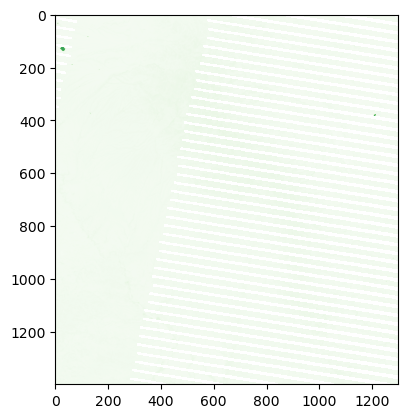

In [3]:
# Create numerator for NDVI equation by subtracting the early NIR raster from the early Red raster
numerator = np.subtract(NIR_before_grid,Red_before_grid)

# Create denominator for NDVI equation by adding the early NIR raster to the early Red raster
denominator = np.add(NIR_before_grid,Red_before_grid)

# Divide numerator by denominator to find NDVI
NDVI_before_grid = numerator/denominator

# Create while loop that keeps going as long as the if statements below are true
while True:
    clip_answer = input('Is zooming in necessary? (Yes or No) ') # Ask the user if they need to zoom in the raster (typically the case with Landsat imagery)
    if clip_answer == 'Yes': # If the user answers "Yes":
        top_row_before = int(input('Please provide top row number for bounding box: ')) # Ask where the top of the bbox should be
        bottom_row_before = int(input('Please provide bottom row number for bounding box: ')) # Ask where the bottom of the bbox should be
        left_column_before = int(input('Please provide left column number for bounding box: ')) # Ask where the left side of the bbox should be
        right_column_before = int(input('Please provide right column number for bounding box: ')) # Ask where the right side of the bbox should be
        if top_row_before == bottom_row_before: # If the top of the bbox is the same as the bottom
            print('Error: Top row and bottom row are the same. Unable to display raster. Please input row numbers again.') # Print an error so the user can understand the issue
            continue # Loop back to start of while loop
        if top_row_before > bottom_row_before: # If the top of the bbox is lower than the bottom
            print('Error: Top row makes up bottom of bounding box. Did you mean',top_row_before,'as the bottom row number and',bottom_row_before,'as the top row number?') # Print an error asking if the user meant to switch the top and bottom numbers
            continue # Loop back to start of while loop
        if left_column_before == right_column_before: # If the left side of the bbox is the same as the right side
            print('Error: Left column and right column are the same. Unable to display raster. Please input column numbers again.') # Print an error so the user can understand the issue
            continue # Loop back to start of while loop
        if left_column_before > right_column_before: # If the left side of the bbox is further right than the right side
            print('Error: Left column makes up right of bounding box. Did you mean',left_column_before,'as the right column number and',right_column_before,'as the left column number?') # Print an error asking if the user meant to switch the left and right numbers
            continue # Loop back to start of while loop
        else: # If no errors have occurred
            NDVI_before_rows = NDVI_before_grid[top_row_before:bottom_row_before] # Create variable holding the rows of the bbox described by the user
            #print(NDVI_2000_rows)

            NDVI_before_clip = [] # Create list to hold all values within the new raster created by the bounding box
            for value in NDVI_before_rows: # For each value within the NDVI_before_rows variable
                NDVI_before_clip.append(value[left_column_before:right_column_before]) # Add only the values within the x values of the bbox defined by the user
            #print(NDVI_before_clip)
            
            print('Here is your zoomed-in raster:') # Introduce NDVI raster
            plt.imshow(NDVI_before_clip,cmap="Greens") # Create raster with updated bbox
            plt.show() # Display raster
            break # End while loop
        
    if clip_answer == 'No': # If user does not need to zoom into the raster
        print('Okay, no zooming needed. Here is the NDVI raster:') # Introduce NDVI raster
        NDVI_before_clip = NDVI_before_grid # Make NDVI_before_clip variable the same as the NDVI_before_grid variable to be used in the following cells
        plt.imshow(NDVI_before_clip,cmap="Greens") # Create NDVI raster
        plt.show() # Display raster
        break # End while loop
        
    if clip_answer != 'Yes' and clip_answer != 'No': # If user answer something other than "Yes" or "No"
        print('Sorry, could not understand "' + clip_answer + '". Please answer "Yes" or "No".') # Print why the answer could not be understand
        continue # Loop back to start of while loop

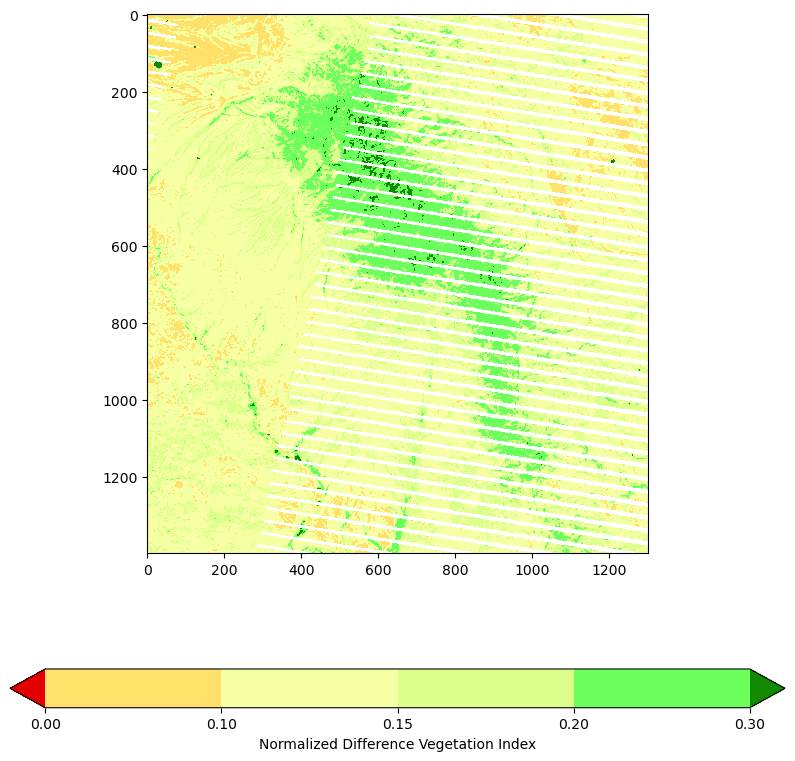

Total area where NDVI is greater than or equal to 0.2: 204.65730000030092 square kilometers.


In [4]:
levels = [0, 0.1, 0.15, 0.2, 0.3] # Make classes to color code different cells and add them to a list
clrs = ['#e20000','#ffe169','#f6ffa3','#dcff8c','#6bff5c','#138900'] # Find appropiate colors to use for each class
    
cmap, norm = colors.from_levels_and_colors(levels, clrs, extend='both') # Use colors.from_levels_and_colors() function to input classes and colors into cmap and norm to create a map with own custom colors

fig, ax = plt.subplots(figsize=(10,10)) # Create a subplot double the size of previous raster displays
NDVI_before = plt.imshow(NDVI_before_clip,cmap=cmap,norm=norm,interpolation='bilinear') # Create a raster with the colors and classes depicted above
fig.colorbar(NDVI_before,ax=ax,orientation='horizontal',label='Normalized Difference Vegetation Index') # Create a colorbar to make it clear to the user of the colors used in the raster
plt.show() # Display plot

if satellite == 'Landsat 7' or satellite == 'Landsat 8':
    total_area_before = 0 # Create starting point for total area of vegetation (habitat)
    for row in NDVI_before_clip: # For row in raster
        for value in row: # For cell in raster
                if value >= 0.2: # If value of cell is greater than or equal to 0.2
                    total_area_before += 0.0009 # Because it is Landsat, add 900 square meters (30m spatial resolution ** 2 = 900 square meters) per cell above 0.2
    print('Total area where NDVI is greater than or equal to 0.2:',total_area_before,'square kilometers.')
    
if satellite == 'Sentinel':
    total_area_before = 0 # Create starting point for total area of vegetation (habitat)
    for row in NDVI_before_clip: # For row in raster
        for value in row: # For cell in raster
                if value >= 0.2: # If value of cell is greater than or equal to 0.2
                    total_area_before += 0.0001 # Because it is Sentinel-2, add 100 square meters (10m spatial resolution ** 2 = 100 square meters) per cell above 0.2
    print('Total area where NDVI is greater than or equal to 0.2:',total_area_before,'square kilometers.')

# Suggested steps when using 2021 Landsat imagery in Sierra_Los_Ajos zipfile for cell below:
#### Is zooming in necessary? (Yes or No) --> Yes
#### Top row number --> 800
#### Bottom row number --> 2200
#### Left column number --> 4600
#### Right column --> 5900

C:\Users\15612\AppData\Local\Temp\ipykernel_17400\2606454166.py:6: RuntimeWarning: invalid value encountered in true_divide
  NDVI_after_grid = numerator/denominator


Is zooming in necessary? (Yes or No) Yes
Please provide top row number for bounding box: 800
Please provide bottom row number for bounding box: 2200
Please provide left column number for bounding box: 4600
Please provide right column number for bounding box: 5900
Here is your zoomed-in raster:


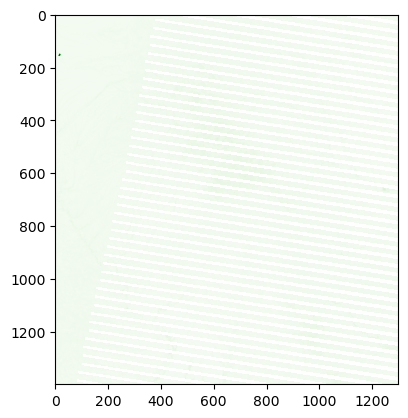

In [5]:
# Repeat all steps from the third code block, except with the most recent imagery
numerator = np.subtract(NIR_after_grid,Red_after_grid)

denominator = np.add(NIR_after_grid,Red_after_grid)

NDVI_after_grid = numerator/denominator

while True:
    clip_answer = input('Is zooming in necessary? (Yes or No) ')
    if clip_answer == 'Yes':
        top_row_after = int(input('Please provide top row number for bounding box: '))
        bottom_row_after = int(input('Please provide bottom row number for bounding box: '))
        left_column_after = int(input('Please provide left column number for bounding box: '))
        right_column_after = int(input('Please provide right column number for bounding box: '))
        if top_row_after == bottom_row_after:
            print('Error: Top row and bottom row are the same. Unable to display raster.')
        if top_row_after > bottom_row_after:
            print('Error: Top row makes up bottom of bounding box. Did you mean',top_row_after,'as the bottom row number and',bottom_row_after,'as the top row number?')
        if left_column_after == right_column_after:
            print('Error: Left column and right column are the same. Unable to display raster.')
        if left_column_after > right_column_after:
            print('Error: Left column makes up right of bounding box. Did you mean',left_column_after,'as the right column number and',right_column_after,'as the left column number?')
        else:
            NDVI_after_rows = NDVI_after_grid[top_row_after:bottom_row_after]
            #print(NDVI_2000_rows)

            NDVI_after_clip = []
            for value in NDVI_after_rows:
                NDVI_after_clip.append(value[left_column_after:right_column_after])
            #print(NDVI_before_clip)
            
            print('Here is your zoomed-in raster:')
            plt.imshow(NDVI_after_clip,cmap="Greens")
            plt.show()
            break
        
    if clip_answer == 'No':
        print('Okay, no zooming needed. Here is the NDVI raster:')
        NDVI_after_clip = NDVI_after_grid
        plt.imshow(NDVI_after_clip,cmap="Greens")
        plt.show()
        break
        
    if clip_answer != 'Yes' and clip_answer != 'No':
        print('Sorry, could not understand "' + clip_answer + '". Please answer "Yes" or "No".')
        continue

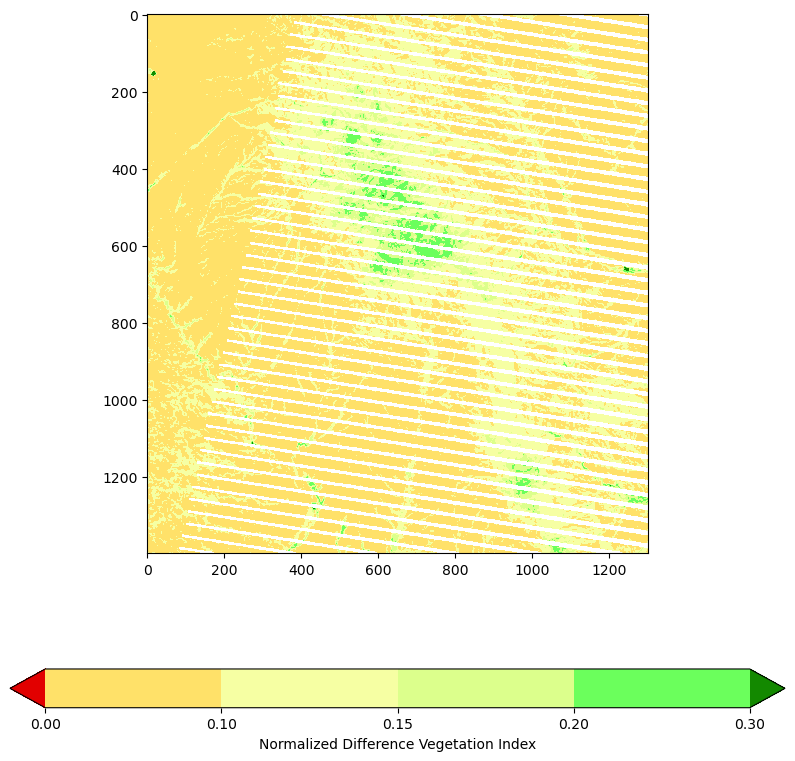

Total area where NDVI is greater than or equal to 0.2: 204.65730000030092 square kilometers.


In [6]:
# Repeat all steps in the fourth coding block, except with the NDVI raster grid calculated from the most recent imagery
levels = [0, 0.1, 0.15, 0.2, 0.3]
clrs = ['#ffe169','#f6ffa3','#dcff8c','#6bff5c','#138900']
    
cmap, norm = colors.from_levels_and_colors(levels, clrs, extend='max')

fig, ax = plt.subplots(figsize=(10,10))
NDVI_after = plt.imshow(NDVI_after_clip,cmap=cmap,norm=norm,interpolation='bilinear')
fig.colorbar(NDVI_before,ax=ax,orientation='horizontal',label='Normalized Difference Vegetation Index')
plt.show()

if satellite == 'Landsat 7' or satellite == 'Landsat 8':
    total_area_before = 0 
    for row in NDVI_before_clip:
        for value in row: 
                if value >= 0.2:
                    total_area_before += 0.0009 
    print('Total area where NDVI is greater than or equal to 0.2:',total_area_before,'square kilometers.')
    
if satellite == 'Sentinel':
    total_area_before = 0 
    for row in NDVI_before_clip: 
        for value in row: 
                if value >= 0.2: 
                    total_area_before += 0.0001 
    print('Total area where NDVI is greater than or equal to 0.2:',total_area_before,'square kilometers.')

Are you looking to find the total area of desertification or the severity of a wildfire? (Input "Desert" for area of desertification or "Wildfire" for wildfire severity.) Desert
Okay, here is your raster showing desertification:


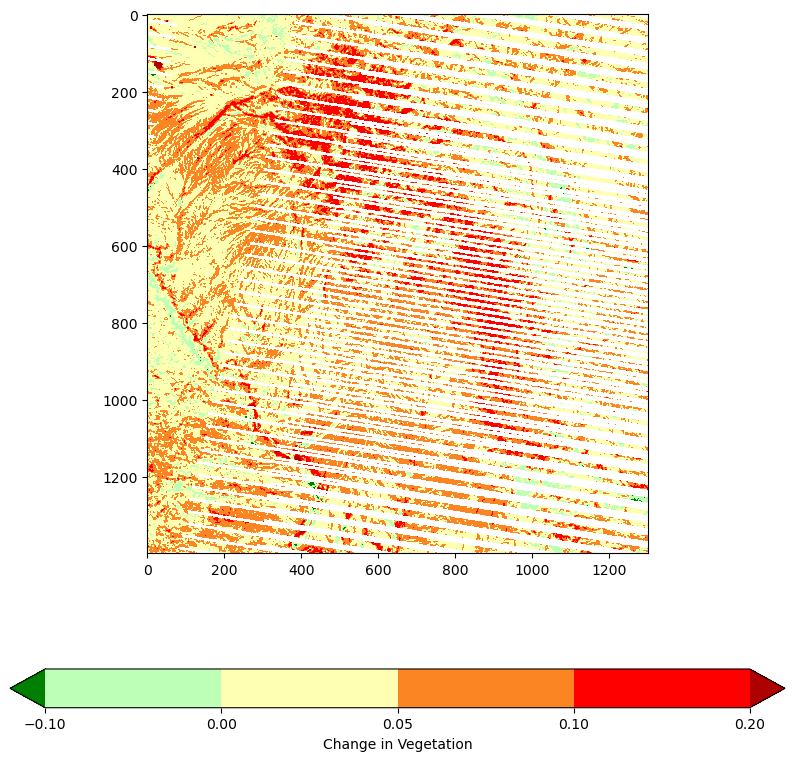

Desertification has led to the equivalent of a low severity burn for an area of about 131 square kilometers.
This is also likely the total area of habitat loss.


In [7]:
while True: # While everything is true
    # Ask user if the output should be calculating area of desertification or burn severity
    desert_or_burn = input('Are you looking to find the total area of desertification or the severity of a wildfire? (Input "Desert" for area of desertification or "Wildfire" for wildfire severity.) ')

    if desert_or_burn == 'Desert': # If user wants to find area of desertification
        print('Okay, here is your raster showing desertification:') # Print introduction to desertification raster

        desertification = np.subtract(NDVI_before_clip,NDVI_after_clip) # Calculate dNBR of both less and more recent rasters

        levels = [-0.1,0,0.05,0.1,0.2] # Define different classes for the raster
        clrs = ['#007f00','#beffb7','#ffffb3','#fc8523','#ff0000','#ad0000'] # Find appropiate colors for each level

        cmap, norm = colors.from_levels_and_colors(levels, clrs, extend='both') # Make cmap and norm variables to hold the color and level information

        fig, ax = plt.subplots(figsize=(10,10)) # Create plot double the size of introduction rasters
        desert = plt.imshow(desertification,cmap=cmap,norm=norm,interpolation='bilinear') # Create map and add to variable
        fig.colorbar(desert,ax=ax,orientation='horizontal',label='Change in Vegetation') # Make a color bar referencing the desert map
        plt.show() # Display the figure

        if satellite == 'Landsat 7' or satellite == 'Landsat 8': # If user acquired data from a Landsat product
            total_area_desert = 0 # Create a starting point for the total area of desertification
            for row in desertification: # For row in desertification raster
                for value in row: # For cell in raster
                    if value >= 0.1: # If value of cell is greater than or equal to 0.1
                        total_area_desert += 0.0009 
                        
        if satellite == 'Sentinel': # If user acquired data from a Sentinel product
            total_area_desert = 0 # Create a starting point for the total area of desertification
            for row in desertification: # For row in desertification raster
                for value in row: # For cell in raster
                    if value >= 0.1: # If value of cell is greater than or equal to 0.1
                        total_area_desert += 0.0001   
        
        # Print total area of desertification equivalent to a low-severity burn
        print('Desertification has led to the equivalent of a low severity burn for an area of about',round(total_area_desert),'square kilometers.') 
        print('This is also likely the total area of habitat loss.')
        break
        
    if desert_or_burn == 'Wildfire': # If user wants to see severity of a burn
        print('Okay, here is your raster showing wildfire severity:')
        
        dNBR = np.subtract(NDVI_before_clip,NDVI_after_clip) # Calculate dNBR

        # Repeat previous steps to create a map with appropiate color classes and a color bar
        levels = [-0.1,0.1,0.27,0.66]
        clrs = ['#007f00','#beffb7','#ffffb3','#fc8523','#ff0000']

        cmap, norm = colors.from_levels_and_colors(levels, clrs, extend='both')

        fig, ax = plt.subplots(figsize=(10,10))
        NBR = plt.imshow(dNBR,cmap=cmap,norm=norm,interpolation='bilinear')
        fig.colorbar(NBR,ax=ax,orientation='horizontal',label='Low to High Severity of Wildfire')
        plt.show()
        
        if satellite == 'Landsat 7' or satellite == 'Landsat 8': # If user acquired data from a Landsat product
            # Create starting points for each class described by the USGS burn severity classes
            regrowth = 0 
            unburned = 0
            low_severity = 0
            mod_severity = 0
            hi_severity = 0
            for row in dNBR: # For row in dNBR raster
                for value in row: # For cell in raster
                    if value < -0.1: # For cell value less than -0.1
                        regrowth += 0.0009 # Add 0.0009 square kilometers (Landsat imagery has a spatial resolution of 30 meters and 30 * 30 = 900 (0.0009 square km))
                    if value >= -0.1 and value < 0.1: # Repeat steps directly above for each level
                        unburned += 0.0009
                    if value >= 0.1 and value < 0.27:
                        low_severity += 0.0009
                    if value >= 0.27 and value < 0.66:
                        mod_severity += 0.0009
                    if value >= 0.66:
                        hi_severity += 0.0009
                        
        if satellite == 'Sentinel': # If user acquired data from a Sentinel product
            # Repeat all steps from above, except add 0.0001 for each cell counted since the Sentinel spatial resolution is 10m (10 * 10 = 100 square meters, which is equal to 0.0001 square kilometers)
            regrowth = 0
            unburned = 0
            low_severity = 0
            mod_severity = 0
            hi_severity = 0
            for row in dNBR:
                for value in row:
                    if value < -0.1:
                        regrowth += 0.0001
                    if value >= -0.1 and value < 0.1:
                        unburned += 0.0001
                    if value >= 0.1 and value < 0.27:
                        low_severity += 0.0001
                    if value >= 0.27 and value < 0.66:
                        mod_severity += 0.0001
                    if value >= 0.66:
                        hi_severity += 0.0001
                    
        print('Approximate area of regrowth:', round(regrowth)) # Print total area of regrowth
        print('Approximate area of unburned vegetation:', round(unburned)) # Print total unburned area
        print('Approximate area of a low severity burn:', round(low_severity)) # Print total area of a low severity burn
        print('Approximate area of a moderate severity burn:', round(mod_severity)) # Print total area of moderate severity burn
        print('Approximate area of a high severity burn:', round(hi_severity)) # Print total area of high severity burn
        break # End the while loop
        
    else:
        print('Sorry, could not understand "' + desert_or_burn + '". Please input "Desert" or "Wildfire".') # If user did not input "Desert" or "Wildfire" create an error
        continue # Loop back to start of while loop

# Conclusion

The final results when looking at the dNBR of the Sierra los Ajos of Northern Mexico conclude that approximately 131 square kilometers of habitat has been lost between 2005 and 2021 for animal species that consider these montane forests home. I used the lowest severity of burn according to the USGS's burn severity table (above 0.1) to measure the total area of desertification. It is worth noting this change occurred within just 16 years and climate change's effects (especially temperature increase) are exponential, so this habitat loss will likely more than double in the next 16 years. As for now, this project was done to allow any user to input NIR and Red band rasters for vegetation monitoring and the specific rasters were used to provide a useful blueprint for monitoring and measuring the total area of habitat loss within this sky island. This project, however, could look at any one of the sky islands, areas of desertification, or areas of wildfires throughout the world and output a detailed analysis of those areas as long as imagery is provided.

If there was anything I would change with this project, I think it is fairly obvious. The Landsat data I gathered from Earth Explorer is continuous at the nadir (the point directly below the satellites path), but becomes discontinuous at the edges. I was not able to find a detailed explanation as to why this was the case, but I believe it is due to distortion at the edges of the image further from the nadir, so dividing them can provide a more accurate representation of the surface. Unfortunately, this does not work well when trying to essentially combine both images into one to show changes in vegetation. I have also tried finding Sentinel-2 data, but the Sentinel satellites were not released until 2014 and 2015, so the changes may not be recordable enough for describing the desertification issues these sky islands face. 

Due to the issues with the Landsat data, I was also only able to successfully present the dNBR of one sky island because much of the other sky islands were located outside of the nadir, however, in the future, with better imagery, I would like to monitor other sky islands and areas of interest. I created this project to be able to simply download some imagery, input it in the project, and output the dNBR, so it should not be too hard to monitor the effects of desertification and wildfires with future imagery.